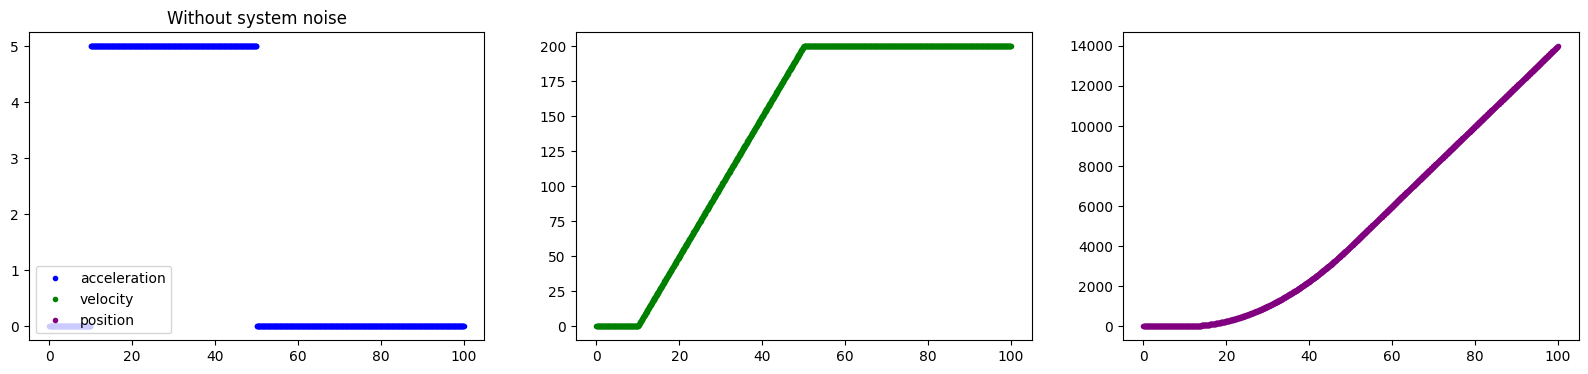

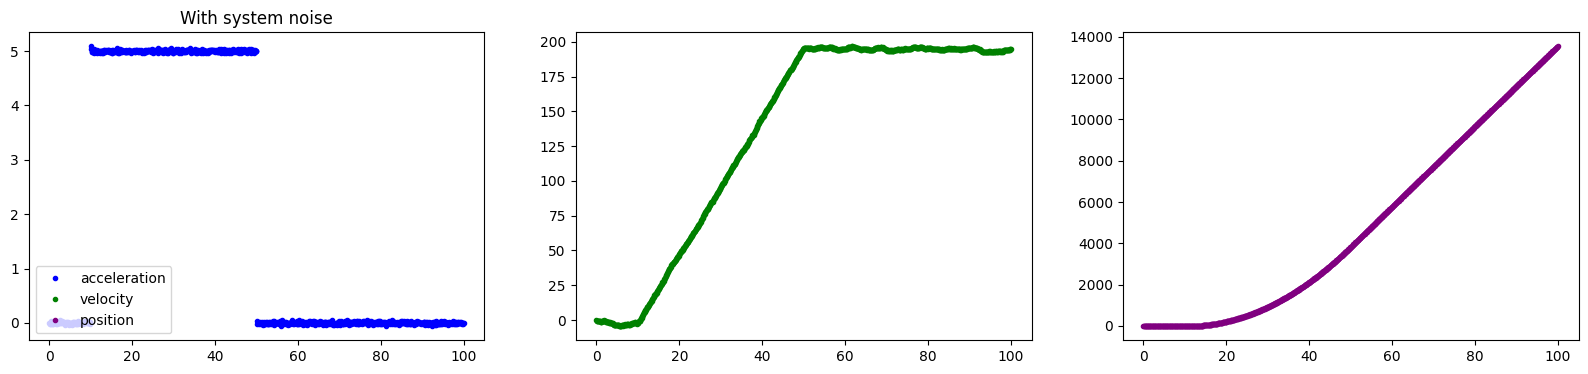

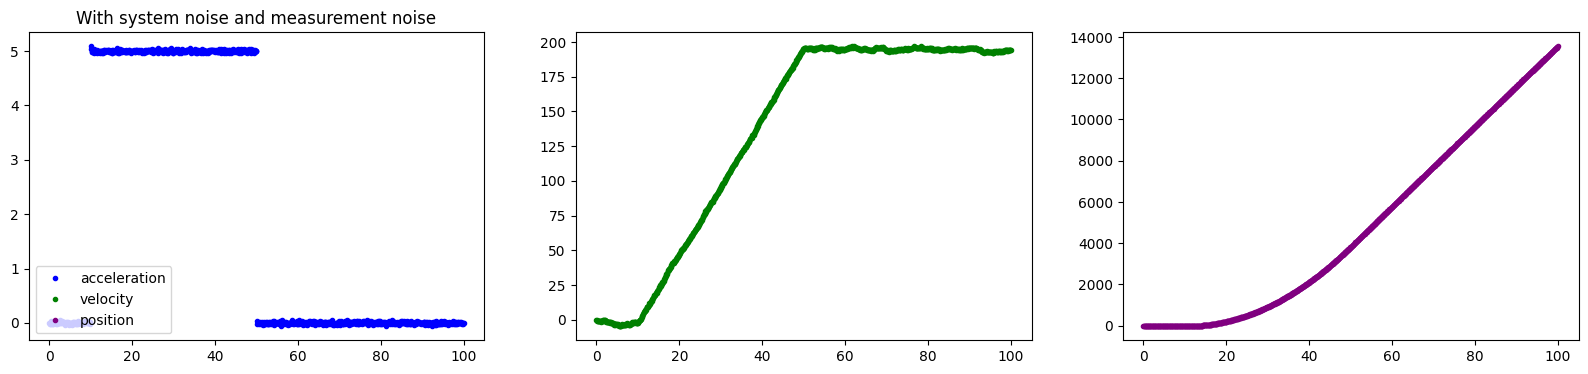

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

l = 1000 # 1000 time steps
t = np.linspace(0, 100, l) # a time interval of 100 seconds
a = np.zeros(1000) # initialize accelaration
v = np.zeros(1000) # initialize velocity
s = np.zeros(1000) # initialize position

# We consider acceleration and velocity as main system error
# position and velocity as main measurement error 

#system dynamics: 
# x(t+1) = Ad * x(t) + Bd * u(t) + G * Z(t) 
# Z(t) stands for system error
# y(t) = C * x(t) + D * u(t) + M(t) 
# M(t) stands for measurement error 
variance_Zs = 0 # /sigma_Zs^2 =11.1 # variance of system error with respect to position
variance_Zv = 0.2 # /sigma_Zv^2 =11.1 # variance of system error with respect to velocity
variance_Za = 0.02 # /sigma_Za^2 =11.1 # variance of system error with respect to acceleration
variance_Ms = 2 # /sigma_Ms^2 = 20 # variance of measurement error with respect to position
variance_Mv = 0.2 # /sigma_Ms^2 = 20 # variance of measurement error with respect to velocity
variance_Ma = 0 # /sigma_Ma^2 =0.2 # variance of measurement error with respect to acceleration
noise_Zs = np.random.normal(0,variance_Zs,1000)
noise_Zv = np.random.normal(0,variance_Zv,1000) 
noise_Za = np.random.normal(0,variance_Za,1000) 
noise_Ms = np.random.normal(0,variance_Ms,1000)  
noise_Mv = np.random.normal(0,variance_Mv,1000)
noise_Ma = np.random.normal(0,variance_Ma,1000)
#system_noise = (0, noise_v, 0)
#measurement_noise = (noise_s, noise_a)
 # x = (s, v , a) + system_noise
  #y = (s, a) + measurement_noise# assume that we can only measure the position and acceleration


# system without system noise
for i in range(0, len(t)):
    if t[i] >= 10 and t[i] <= 50:
        a[i]= 5
    else:
        a[i]=0
    a[-1]=0
    v[-1]=0
    s[-1]=0
    v[i] = v[i-1] + a[i-1] * (100/l) 
    s[i] = s[i-1] + v[i-1] * (100/l)+ 0.5*a[i-1]*(100/l)*(100/l)

fig, axs = plt.subplots(1,3,figsize=(20,4))
axs[0].set_title("Without system noise")
line1, = axs[0].plot(t, a, '.', color='blue', label='acceleration')
line2, = axs[1].plot(t, v, '.', color='green', label='velocity')
line3, = axs[2].plot(t, s, '.', color='purple', label='position')
axs[0].legend(handles=[line1,line2,line3,], loc='lower left')


# system with noise
for i in range(1, len(t)):
    if t[i] >= 10 and t[i] <= 50:
        a[i]= 5 + noise_Za[i]
    else:
        a[i]= 0 + noise_Za[i]
    a[-1]=0
    v[-1]=0
    s[-1]=0
    v[i] = v[i-1] + a[i-1] * (100/l) + noise_Zv[i-1]
    s[i] = s[i-1] + v[i-1] * (100/l) + 0.5*a[i-1]*(100/l)*(100/l)+ noise_Zs[i-1]

fig, axs = plt.subplots(1,3,figsize=(20,4))
axs[0].set_title("With system noise")
line1, = axs[0].plot(t, a, '.', color='blue', label='acceleration')
line2, = axs[1].plot(t, v, '.', color='green', label='velocity')
line3, = axs[2].plot(t, s, '.', color='purple', label='position')
axs[0].legend(handles=[line1,line2,line3,], loc='lower left')

fig, axs = plt.subplots(1,3,figsize=(20,4))
axs[0].set_title("With system noise and measurement noise")
#axs.set_xlabel('time')
#plt.ylabel("Calorie Burnage")
line1, = axs[0].plot(t, a + noise_Ma , '.', color='blue', label='acceleration')
line2, = axs[1].plot(t, v + noise_Mv , '.', color='green', label='velocity')
line3, = axs[2].plot(t, s + noise_Ms , '.', color='purple', label='position')
axs[0].legend(handles=[line1,line2,line3,], loc='lower left')